In [ ]:
import pandas as pd 
import asyncio
from yahoo_finance_async import OHLC, Interval, History
import pandas_datareader as dr
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import itertools
import datetime
import time

#use this to fix await issue 
import nest_asyncio
nest_asyncio.apply()

import asyncio
await = lambda x: asyncio.get_event_loop().run_until_complete(x)

In [ ]:


data = await(OHLC.fetch('BTC-USD', Interval.HOUR, history=History.FIVE_DAYS))
df = pd.DataFrame.from_dict(data['candles'])
df

,datetime,open,high,low,close,volume
0,2021-01-05 00:00:00,31977.041016,32846.136719,31977.041016,32519.349609,0.000000e+00
1,2021-01-05 01:00:00,32531.273438,32693.884766,32326.923828,32693.884766,2.298986e+09
2,2021-01-05 02:00:00,32694.039062,32767.416016,32314.019531,32363.474609,0.000000e+00
3,2021-01-05 03:00:00,32342.125000,32569.123047,31344.828125,31515.662109,0.000000e+00
4,2021-01-05 04:00:00,31450.617188,31536.785156,30782.414062,31102.927734,3.158999e+08
...,...,...,...,...,...,...
103,2021-01-09 07:00:00,39213.152344,39758.312500,38980.875000,39614.898438,0.000000e+00
104,2021-01-09 08:00:00,39645.910156,40365.246094,39513.351562,40312.113281,8.991212e+08
105,2021-01-09 09:00:00,40320.328125,40820.496094,40320.328125,40446.234375,1.526579e+08
106,2021-01-09 10:00:00,40427.660156,40509.871094,40343.183594,40373.707031,0.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  108 non-null    datetime64[ns]
 1   open      108 non-null    float64       
 2   high      108 non-null    float64       
 3   low       108 non-null    float64       
 4   close     108 non-null    float64       
 5   volume    108 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 5.2 KB


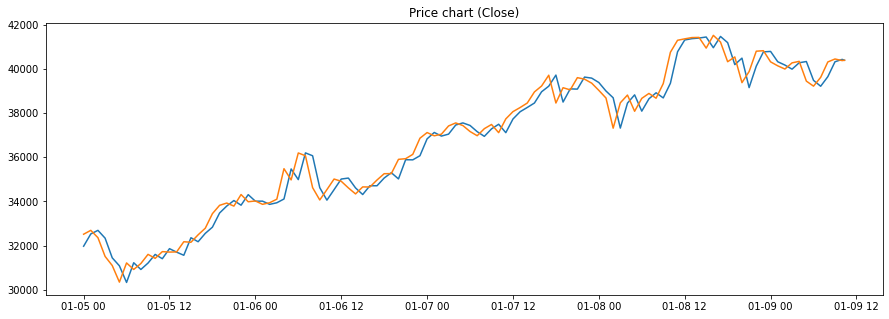

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df[['open', 'close']])
plt.title('Price chart (Close)')
plt.show()

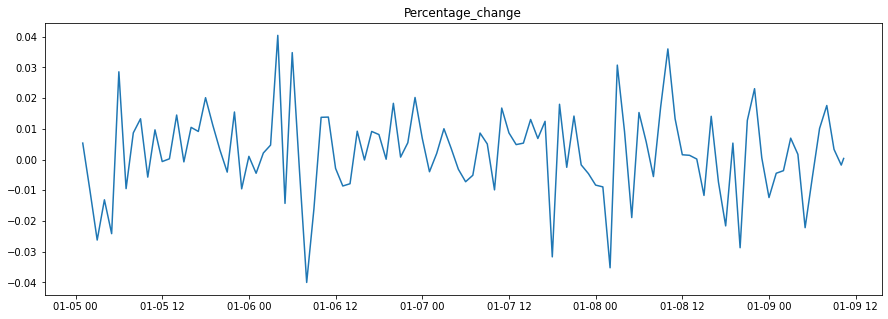

In [ ]:
df['Percentage_change'] = df['close'].pct_change()

plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['Percentage_change'])
plt.title('Percentage_change')
plt.show()

In [ ]:
#Adding momentum as a column

In [ ]:
df['Price_change'] = df['close'] - df['open']

In [ ]:
df = df.fillna(0)

In [ ]:
mom = []

step_up_T = 0
step_down_T = 0

for i in df.Price_change: 
    if i >= 0 : 
        step_up_T += 1
        mom.append(step_up_T)
        step_down_T = 0
        
        
    elif i < 0: 
        step_down_T -= 1
        mom.append(step_down_T)
        step_up_T = 0
        

In [ ]:
df['Momentum'] = mom
pd.set_option('display.max_rows', 120)
df

,datetime,open,high,low,close,volume,Percentage_change,Price_change,Momentum
0,2021-01-05 00:00:00,31977.041016,32846.136719,31977.041016,32519.349609,0.000000e+00,0.000000,542.308594,1
1,2021-01-05 01:00:00,32531.273438,32693.884766,32326.923828,32693.884766,2.298986e+09,0.005367,162.611328,2
2,2021-01-05 02:00:00,32694.039062,32767.416016,32314.019531,32363.474609,0.000000e+00,-0.010106,-330.564453,-1
3,2021-01-05 03:00:00,32342.125000,32569.123047,31344.828125,31515.662109,0.000000e+00,-0.026197,-826.462891,-2
4,2021-01-05 04:00:00,31450.617188,31536.785156,30782.414062,31102.927734,3.158999e+08,-0.013096,-347.689453,-3
5,2021-01-05 05:00:00,31090.548828,31360.498047,30332.515625,30352.734375,0.000000e+00,-0.024120,-737.814453,-4
6,2021-01-05 06:00:00,30337.712891,31277.335938,30221.187500,31220.056641,1.538261e+09,0.028575,882.343750,1
7,2021-01-05 07:00:00,31228.873047,31273.076172,30924.255859,30924.691406,0.000000e+00,-0.009461,-304.181641,-1
8,2021-01-05 08:00:00,30924.564453,31508.500000,30893.595703,31193.699219,0.000000e+00,0.008699,269.134766,1
9,2021-01-05 09:00:00,31214.484375,31811.406250,31214.484375,31608.203125,0.000000e+00,0.013288,393.718750,2


In [ ]:
#Adding RSI 

In [ ]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi


In [ ]:
df['RSI'] = computeRSI(df['close'], df.shape[0]/24)

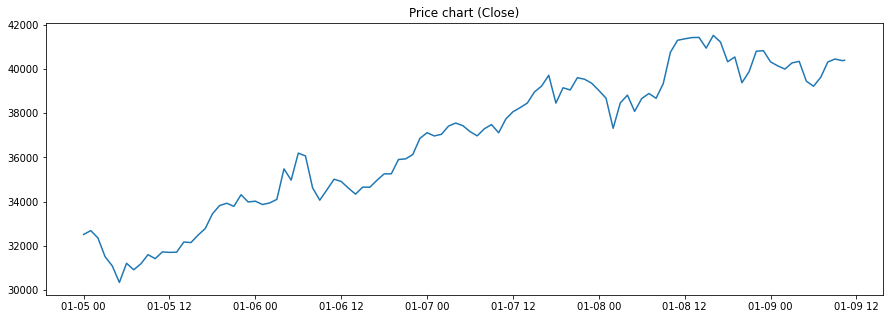

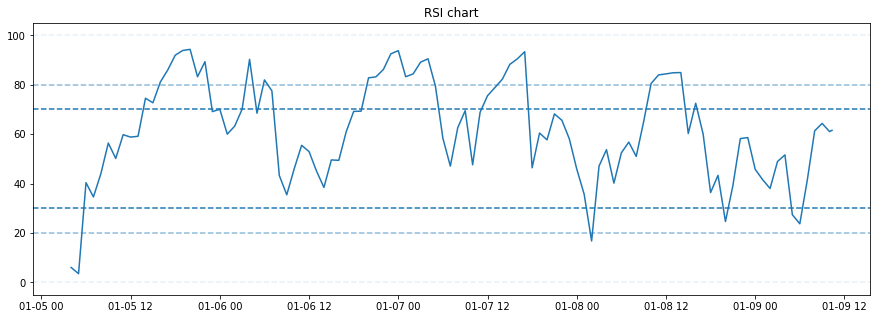

In [ ]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['close'])
plt.title('Price chart (Close)')
plt.show()


# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('RSI chart')
plt.plot(df['datetime'], df['RSI'])

plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()

In [ ]:
df.dropna(inplace=True)
df

,datetime,open,high,low,close,volume,Percentage_change,Price_change,Momentum,RSI
4,2021-01-05 04:00:00,31450.617188,31536.785156,30782.414062,31102.927734,3.158999e+08,-0.013096,-347.689453,-3,6.064365
5,2021-01-05 05:00:00,31090.548828,31360.498047,30332.515625,30352.734375,0.000000e+00,-0.024120,-737.814453,-4,3.541681
6,2021-01-05 06:00:00,30337.712891,31277.335938,30221.187500,31220.056641,1.538261e+09,0.028575,882.343750,1,40.396856
7,2021-01-05 07:00:00,31228.873047,31273.076172,30924.255859,30924.691406,0.000000e+00,-0.009461,-304.181641,-1,34.607248
8,2021-01-05 08:00:00,30924.564453,31508.500000,30893.595703,31193.699219,0.000000e+00,0.008699,269.134766,1,44.004571
9,2021-01-05 09:00:00,31214.484375,31811.406250,31214.484375,31608.203125,0.000000e+00,0.013288,393.718750,2,56.413511
10,2021-01-05 10:00:00,31605.390625,31693.804688,31284.894531,31427.669922,0.000000e+00,-0.005712,-177.720703,-1,50.185705
11,2021-01-05 11:00:00,31411.406250,31737.267578,31387.982422,31731.769531,0.000000e+00,0.009676,320.363281,1,59.797567
12,2021-01-05 12:00:00,31866.226562,32067.806641,31699.515625,31711.394531,0.000000e+00,-0.000642,-154.832031,-1,58.819871
13,2021-01-05 13:00:00,31707.421875,31898.923828,31696.802734,31719.320312,0.000000e+00,0.000250,11.898438,1,59.153881


## Building Neural network

# Drawing Insights from NN

In [ ]:
#allocating traingin and testing data 
X = df.loc[:,['open', 'high', 'low', 'close', 'RSI', 'Price_change', 'Percentage_change']]
y = df.loc[:, 'Momentum']

In [ ]:
# Put the response y into an array
y = np.ravel(y)

In [ ]:
#Split Training and Testing Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Scale Data 
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train) 

X_test = scaler.transform(X_test)

In [ ]:
reg = MLPRegressor(max_iter=15000, solver="lbfgs", activation="tanh", hidden_layer_sizes=(7),random_state=1 )
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE before regularisation
mean_squared_error(y_pred, y_test)

15.690343937752365

In [ ]:
# Find regularisation parameter
reg_par = [np.e**n for n in np.arange(-10,10,1)] 

# Optimise neural network with regularisation
validation_scores = {}
print(" alpha  |  Sq.Error")  

for i in reg_par: 
    reg = MLPRegressor(max_iter=15000, hidden_layer_sizes=(5), alpha=i, random_state=1)
    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=3, scoring='neg_mean_squared_error')
    
    validation_scores[i] = -score.mean()
    print("%0.6f |  %0.6f" % (i, -score.mean()))

 alpha  |  Sq.Error
0.000045 |  1.490266
0.000123 |  1.490540
0.000335 |  1.490376
0.000912 |  1.490048
0.002479 |  1.489991
0.006738 |  1.490107
0.018316 |  1.495727
0.049787 |  1.496403
0.135335 |  1.498316
0.367879 |  1.508235
1.000000 |  1.509311
2.718282 |  1.470529
7.389056 |  1.579651
20.085537 |  1.837751
54.598150 |  2.611708
148.413159 |  5.041968
403.428793 |  5.256402
1096.633158 |  5.271980
2980.957987 |  5.277604
8103.083928 |  5.281098


Text(0, 0.5, 'Mean Sq Error')

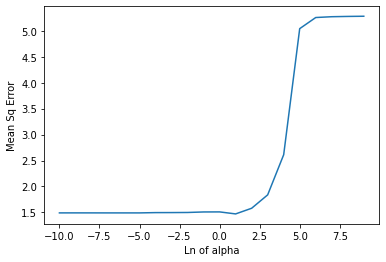

In [ ]:
# Plot the error function    
plt.plot([np.log(i) for i in validation_scores.keys()], list(validation_scores.values()))
plt.xlabel("Ln of alpha")
plt.ylabel("Mean Sq Error")

In [ ]:
print("The lowest cross validation error is %f" % min(validation_scores.values()))        
print("This corresponds to regularisation parameter e**%s" % 
      ([np.log(name) for name, score in validation_scores.items()
                        if score==min(validation_scores.values())][0]))

The lowest cross validation error is 1.470529
This corresponds to regularisation parameter e**1.0


In [ ]:
reg = MLPRegressor(max_iter=9000, solver="lbfgs", activation="tanh", alpha=np.e**(1),hidden_layer_sizes=(7), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE final
mean_squared_error(y_pred, y_test)

1.3439748197389094

In [ ]:
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.median()).transpose()

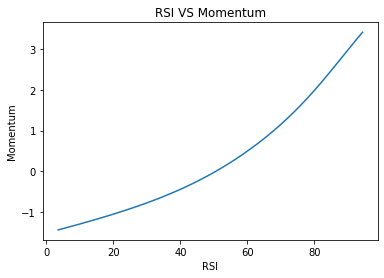

In [ ]:
# Obtain the min and max of the Percentage_change variable and set up a sequence

min_res = min(X.loc[:, 'RSI'])
max_res = max(X.loc[:, 'RSI'])
seq = np.linspace(start=min_res, stop=max_res, num=500)

# Set up a list of moving resultants
to_predict = []
for i in seq:
    X_design_vec.loc[0, 'RSI'] = i
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
to_predict = scaler.transform(to_predict)
predictions = reg.predict(to_predict)

# Plot 
plt.plot(seq,predictions)
plt.xlabel("RSI")
plt.ylabel("Momentum")
plt.title("RSI VS Momentum")
plt.show()

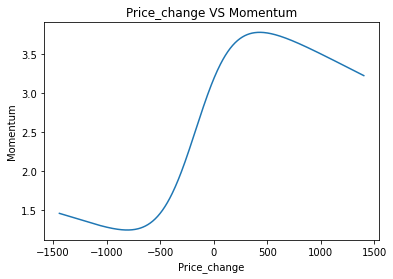

In [ ]:
# Obtain the min and max of the Percentage_change variable and set up a sequence

min_res = min(X.loc[:, 'Price_change'])
max_res = max(X.loc[:, 'Price_change'])
seq = np.linspace(start=min_res, stop=max_res, num=500)

# Set up a list of moving resultants
to_predict = []
for i in seq:
    X_design_vec.loc[0, 'Price_change'] = i
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
to_predict = scaler.transform(to_predict)
predictions = reg.predict(to_predict)

# Plot 
plt.plot(seq,predictions)
plt.xlabel("Price_change")
plt.ylabel("Momentum")
plt.title("Price_change VS Momentum")
plt.show()

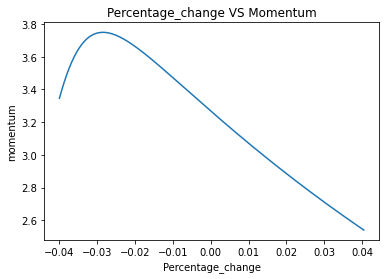

In [ ]:
# Obtain the min and max of the Percentage_change variable and set up a sequence

min_res = min(X.loc[:, 'Percentage_change'])
max_res = max(X.loc[:, 'Percentage_change'])
seq = np.linspace(start=min_res, stop=max_res, num=500)

# Set up a list of moving resultants
to_predict = []
for i in seq:
    X_design_vec.loc[0, 'Percentage_change'] = i
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
to_predict = scaler.transform(to_predict)
predictions = reg.predict(to_predict)

# Plot 
plt.plot(seq,predictions)
plt.xlabel("Percentage_change")
plt.ylabel("momentum")
plt.title("Percentage_change VS Momentum")
plt.show()

# Building predictive NN

In [ ]:
#allocating traingin and testing data 
X = df.loc[:,['open', 'high', 'low']]
y = df.loc[:, 'close']

In [ ]:
# Put the response y into an array
y = np.ravel(y)

In [ ]:
#Split Training and Testing Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Scale Data 
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train) 

X_test = scaler.transform(X_test)

In [ ]:
reg = MLPRegressor(max_iter=15000, solver="lbfgs", activation="tanh", hidden_layer_sizes=(3),random_state=1 )
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE before regularisation
mean_squared_error(y_pred, y_test)

10233267.065797372

In [ ]:
# Find regularisation parameter
reg_par = [np.e**n for n in np.arange(-2,2,1)] 

# Optimise neural network with regularisation
validation_scores = {}
print(" alpha  |  Sq.Error")  

for i in reg_par: 
    reg = MLPRegressor(max_iter=1000000, hidden_layer_sizes=(3), alpha=i, random_state=1)
    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=3, scoring='neg_mean_squared_error')
    
    validation_scores[i] = -score.mean()
    print("%0.6f |  %0.6f" % (i, -score.mean()))

 alpha  |  Sq.Error
0.135335 |  45652.519682
0.367879 |  45652.083623
1.000000 |  45644.884616
2.718282 |  45656.813538


Text(0, 0.5, 'Mean Sq Error')

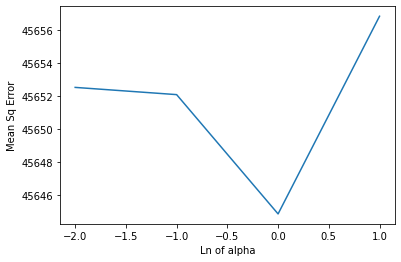

In [ ]:
# Plot the error function    
plt.plot([np.log(i) for i in validation_scores.keys()], list(validation_scores.values()))
plt.xlabel("Ln of alpha")
plt.ylabel("Mean Sq Error")

In [ ]:
print("The lowest cross validation error is %f" % min(validation_scores.values()))        
print("This corresponds to regularisation parameter e**%s" % 
      ([np.log(name) for name, score in validation_scores.items()
                        if score==min(validation_scores.values())][0]))

The lowest cross validation error is 45644.884616
This corresponds to regularisation parameter e**0.0


In [ ]:
reg = MLPRegressor(max_iter=9000, solver="lbfgs", activation="tanh", alpha=np.e**(0),hidden_layer_sizes=(5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE final
mean_squared_error(y_pred, y_test)

30686.695361737125

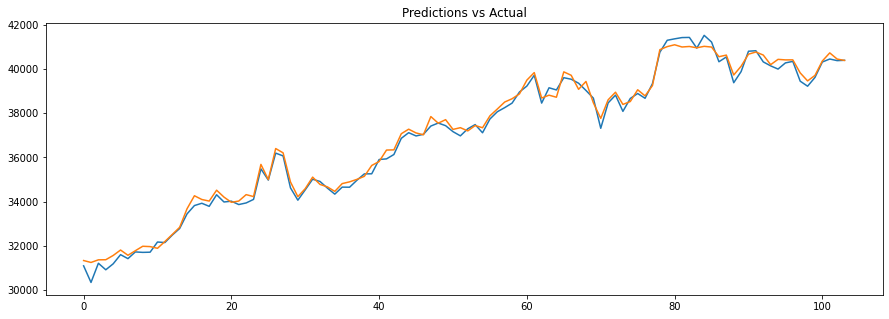

In [ ]:
#plot the figure

#scale X data so that its the same as the training data 
scaler.fit(X)
X_new = scaler.transform(X) 

#plot
y_predict = reg.predict(X_new)
plt.figure(figsize=(15,5))
plt.plot(y)
plt.plot(y_predict)
plt.title('Predictions vs Actual')
plt.show()

# Building Deep(er) neural network

In [ ]:
X = df.loc[:,['open', 'high', 'low']]
y = df.loc[:, 'close']

In [ ]:
# Put the response y into an array
y = np.ravel(y)

In [ ]:
#Split Training and Testing Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Scale Data 
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train) 

X_test = scaler.transform(X_test)

In [ ]:
reg = MLPRegressor(max_iter=15000, solver="lbfgs", activation="tanh", hidden_layer_sizes=(3,6),random_state=1 )
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE before regularisation
mean_squared_error(y_pred, y_test)

10054454.435344927

In [ ]:
# Find regularisation parameter
reg_par = [np.e**n for n in np.arange(2,12,1)] 

# Optimise neural network with regularisation
validation_scores = {}
print(" alpha  |  Sq.Error")  

for i in reg_par: 
    reg = MLPRegressor(max_iter=1000000, hidden_layer_sizes=(3,6), alpha=i, random_state=1)
    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=3, scoring='neg_mean_squared_error')
    
    validation_scores[i] = -score.mean()
    print("%0.6f |  %0.6f" % (i, -score.mean()))

 alpha  |  Sq.Error
7.389056 |  45602.928301
20.085537 |  45647.505616
54.598150 |  45587.879137
148.413159 |  45593.712670
403.428793 |  45632.773214
1096.633158 |  45609.115365
2980.957987 |  46508.389357
8103.083928 |  55448.693469
22026.465795 |  84354.407200
59874.141715 |  107283.225461


Text(0, 0.5, 'Mean Sq Error')

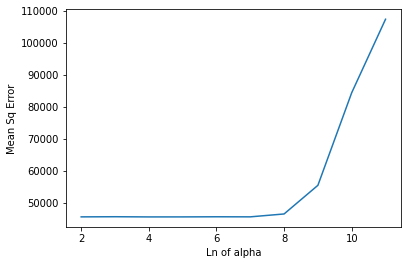

In [ ]:
# Plot the error function    
plt.plot([np.log(i) for i in validation_scores.keys()], list(validation_scores.values()))
plt.xlabel("Ln of alpha")
plt.ylabel("Mean Sq Error")

In [ ]:
print("The lowest cross validation error is %f" % min(validation_scores.values()))        
print("This corresponds to regularisation parameter e**%s" % 
      ([np.log(name) for name, score in validation_scores.items()
                        if score==min(validation_scores.values())][0]))

The lowest cross validation error is 45587.879137
This corresponds to regularisation parameter e**4.0


In [ ]:
reg = MLPRegressor(max_iter=20000, solver="lbfgs", activation="tanh", alpha=np.e**(4),hidden_layer_sizes=(3,6), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE final
mean_squared_error(y_pred, y_test)

10054462.181084665

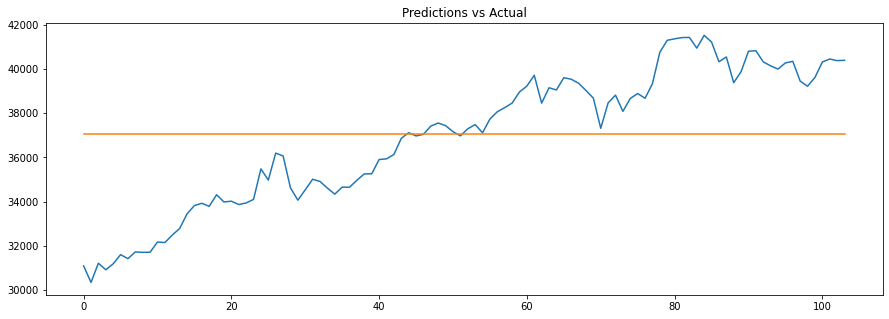

In [ ]:
#plot the figure

#scale X data so that its the same as the training data 
scaler.fit(X)
X = scaler.transform(X) 

#plot
y_predict = reg.predict(X)
plt.figure(figsize=(15,5))
plt.plot(y)
plt.plot(y_predict)
plt.title('Predictions vs Actual')
plt.show()